In [343]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import itertools as it

In [344]:
## 'non-invasive' 'multifocal' 'tumour<1cm, grade 1' 'tumour>2cm, grade 2'

var = "tumour>2cm, grade 2"

In [345]:
data = pd.read_csv("./data/testset_set_echte_data1.csv", sep=';', on_bad_lines='skip')
data = data[data['F20DEATHCAU'] == "Kanker"]
data = data[data['RF01INC01'] == var]


In [346]:
data.head()

,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,genprof,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,"palab,,,"
15,22-5-1927,1-1-1925,4-7-2009,65,2017/04,Q1/2014,2012,Dr. Pieter de Vries,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,1,Onbekend,Tomografie,1-9-1925,17-4-1924,1928,101-123456,79,101-123456,"51,"
36,24-7-1929,1-1-1925,19-3-2010,78,2018/07,Q4/2016,2020,Dr. Anna Bakker,Dr. Anna Bakker,"tumour<1cm, grade 1",...,1,Onbekend,Tomografie,9-4-1923,1-11-1925,1927,101-123456,87,101-123456,"96,"
55,3-11-1926,1-1-1925,8-10-2013,79,2013/09,Q3/2013,2017,Dr. Sophie Jansen,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,0,Onbekend,Tomografie,4-11-1921,25-12-1921,1928,101-123456,67,101-123456,"81,"
56,17-5-1921,1-1-1925,14-11-2006,67,2017/06,Q3/2011,2021,Dr. Robbert Willems,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,0,Onbekend,Tomografie,18-2-1923,31-12-1924,1932,101-123456,99,101-123456,"67,"
61,19-7-1926,1-1-1925,31-5-2007,77,2014/03,Q4/2022,2019,Dr. Pieter de Vries,Dr. Pieter de Vries,"tumour>2cm, grade 2",...,1,Onbekend,Tomografie,15-5-1921,31-5-1922,1934,101-123456,65,101-123456,"55,"


In [347]:
data['REGDAT'] = pd.to_datetime(data['REGDAT'], dayfirst=True, errors='coerce')
data['BIRTHDAT'] = pd.to_datetime(data['BIRTHDAT'], dayfirst=True, errors='coerce')


data['TIME'] = (data['REGDAT'] - data['BIRTHDAT']).dt.days // 365

In [348]:
data.dtypes

BIRTHDAT        datetime64[ns]
BIRTHDATANON            object
REGDAT          datetime64[ns]
AGEREG                   int64
REGMON                  object
                     ...      
panrpre                 object
palabpre                 int64
panr                    object
palab,,,                object
TIME                     int64
Length: 218, dtype: object

In [349]:
data.tail()




,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,"palab,,,",TIME
115,1927-05-22,1-1-1925,2009-07-04,65,2017/04,Q1/2014,2012,Dr. Pieter de Vries,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,Onbekend,Tomografie,1-9-1925,17-4-1924,1928,101-123456,79,101-123456,"51,",82
136,1929-07-24,1-1-1925,2010-03-19,78,2018/07,Q4/2016,2020,Dr. Anna Bakker,Dr. Anna Bakker,"tumour<1cm, grade 1",...,Onbekend,Tomografie,9-4-1923,1-11-1925,1927,101-123456,87,101-123456,"96,",80
155,1926-11-03,1-1-1925,2013-10-08,79,2013/09,Q3/2013,2017,Dr. Sophie Jansen,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,Onbekend,Tomografie,4-11-1921,25-12-1921,1928,101-123456,67,101-123456,"81,",86
156,1921-05-17,1-1-1925,2006-11-14,67,2017/06,Q3/2011,2021,Dr. Robbert Willems,Dr. Sophie Jansen,"tumour<1cm, grade 1",...,Onbekend,Tomografie,18-2-1923,31-12-1924,1932,101-123456,99,101-123456,"67,",85
161,1926-07-19,1-1-1925,2007-05-31,77,2014/03,Q4/2022,2019,Dr. Pieter de Vries,Dr. Pieter de Vries,"tumour>2cm, grade 2",...,Onbekend,Tomografie,15-5-1921,31-5-1922,1934,101-123456,65,101-123456,"55,",80


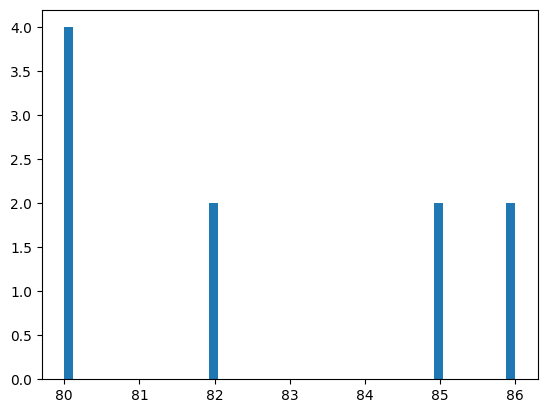

In [350]:
time = "TIME"
event = "F20CRF"
method = "chemo"
method1 = "later"
method2 = "hormonth"
method3 = "neoadjther"
T = data[time]
E = data[event]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

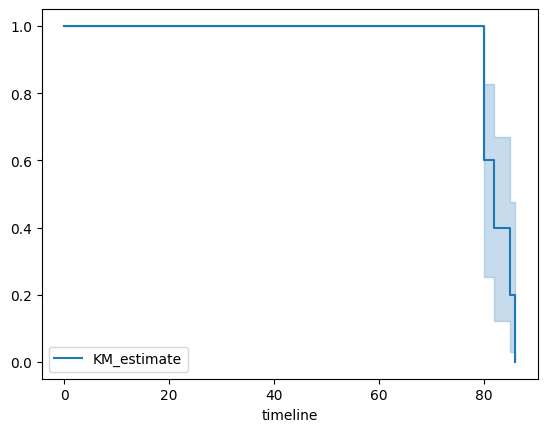

In [351]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()


In [352]:
cph = CoxPHFitter(penalizer=0.01)
columns = [time, event, method, method1, method2, method3]
cph.fit(data[columns], duration_col = time, event_col = event)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10 total observations, 0 right-censored observations>
             duration col = 'TIME'
                event col = 'F20CRF'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 10
number of events observed = 10
   partial log-likelihood = -7.51
         time fit was run = 2025-05-26 23:36:27 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
chemo       2.03      7.61      4.30           -6.39           10.45                0.00            34601.54
later       4.04     57.09      3.37           -2.56           10.65                0.08            42207.43
hormonth    2.71     14.96      4.46           -6.03           11.44                0.00            93403.90
neoadjther -2.03      0.13      4.30          -10.45            6.39                0.00              598.06

            cmp to     z    p  -log2(p)
covariate                              
chemo         0.00  0.47 0.64      0.65
later         0.00  1.20 0.23      2.12
hormonth      0.00  0.61 0.54      0.88
neoadjther    0.00 -0.47 0.64      0.65
---
Concordance = 0.94
Partial AIC = 23.02
log-likelihood ratio test = 15.19 on 4 df
-log2(p) of ll-ratio test = 7.85

<Axes: xlabel='log(HR) (95% CI)'>

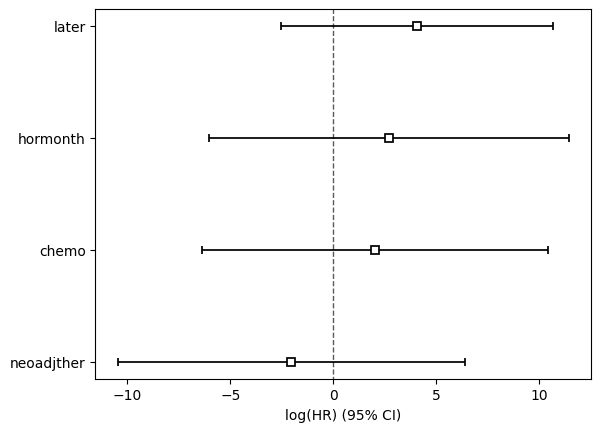

In [353]:
cph.plot()

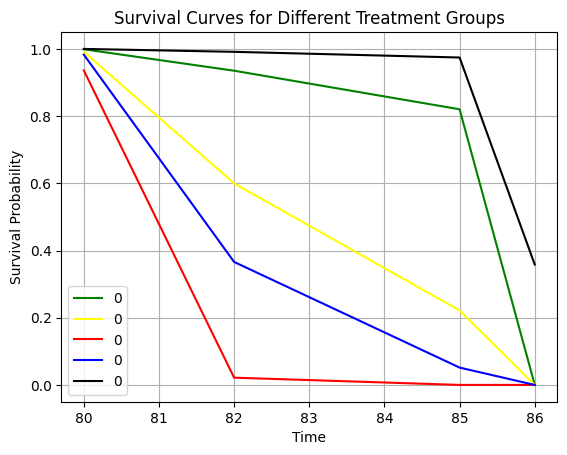

In [354]:
group_1 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [0]})
group_2 = pd.DataFrame({ method : [1], method1 : [0], method2: [0], method3: [0]})
group_3 = pd.DataFrame({ method : [0], method1 : [1], method2: [0], method3: [0]})
group_4 = pd.DataFrame({ method : [0], method1 : [0], method2: [1], method3: [0]})
group_5 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [1]})

ax = cph.predict_survival_function(group_1).plot(label="Chemo=0, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="green")
cph.predict_survival_function(group_2).plot(ax=ax, label="Chemo=1, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="yellow")
cph.predict_survival_function(group_3).plot(ax=ax, label="Chemo=0, Later=1, hormonth=0, neoadjther=0", linestyle='-', color="red")
cph.predict_survival_function(group_4).plot(ax=ax, label="Chemo=0, Later=0, hormonth=1, neoadjther=0", linestyle='-', color="blue")
cph.predict_survival_function(group_5).plot(ax=ax, label="Chemo=0, Later=0, hormonth=0, neoadjther=1", linestyle='-', color="black")


# Finalize plot
plt.title("Survival Curves for Different Treatment Groups")
plt.xlabel("Time")

plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()